In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
%matplotlib inline
import time

### Importing Models

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [3]:
from PARAMS import FULL_DATA_NEW_20_PATH, FULL_DATA_NEW_40_PATH, FULL_DATA_NEW_60_PATH, FULL_DATA_NEW_80_PATH, FULL_DATA_NEW_100_PATH

In [4]:
dataset_20 = pd.read_csv(FULL_DATA_NEW_20_PATH)
dataset_40 = pd.read_csv(FULL_DATA_NEW_40_PATH)
dataset_60 = pd.read_csv(FULL_DATA_NEW_60_PATH)
dataset_80 = pd.read_csv(FULL_DATA_NEW_80_PATH)
dataset_100 = pd.read_csv(FULL_DATA_NEW_100_PATH)

In [5]:
dataset_20 = dataset_20.iloc[:, [4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42]]
dataset_40 = dataset_40.iloc[:, [4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42]]
dataset_60 = dataset_60.iloc[:, [4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42]]
dataset_80 = dataset_80.iloc[:, [4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42]]
dataset_100 = dataset_100.iloc[:, [4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42]]

### Declaring variables

In [6]:
# Independent
X_20 = dataset_20.drop(dataset_20.columns[19], axis=1)
X_40 = dataset_40.drop(dataset_40.columns[19], axis=1)
X_60 = dataset_60.drop(dataset_60.columns[19], axis=1)
X_80 = dataset_80.drop(dataset_80.columns[19], axis=1)
X_100 = dataset_100.drop(dataset_100.columns[19], axis=1)

# Dependent
y_20 = dataset_20.iloc[:, 19].values
y_40 = dataset_40.iloc[:, 19].values
y_60 = dataset_60.iloc[:, 19].values
y_80 = dataset_80.iloc[:, 19].values
y_100 = dataset_100.iloc[:, 19].values

### Print Heatmaps

#### Download chart with
plt.savefig('10_heatmap_20_1.png', dpi=300, bbox_inches='tight')

<AxesSubplot:>

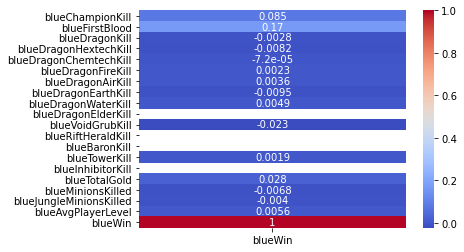

In [7]:
sns.heatmap(dataset_20.corr()[['blueWin']].head(20), annot=True, cmap='coolwarm')

<AxesSubplot:>

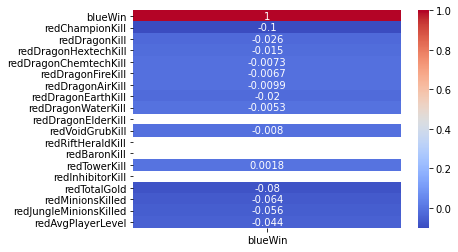

In [8]:
sns.heatmap(dataset_20.corr()[['blueWin']].tail(19), annot=True, cmap='coolwarm')

<AxesSubplot:>

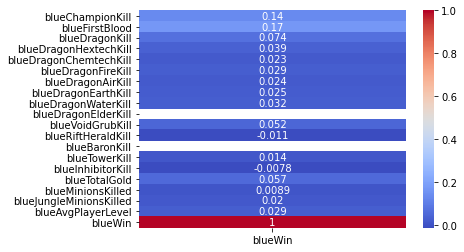

In [9]:
sns.heatmap(dataset_40.corr()[['blueWin']].head(20), annot=True, cmap='coolwarm')

<AxesSubplot:>

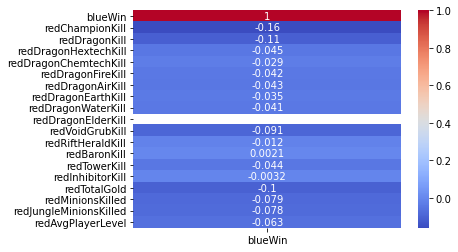

In [10]:
sns.heatmap(dataset_40.corr()[['blueWin']].tail(19), annot=True, cmap='coolwarm')

<AxesSubplot:>

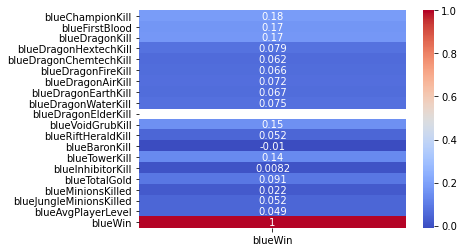

In [11]:
sns.heatmap(dataset_60.corr()[['blueWin']].head(20), annot=True, cmap='coolwarm')

<AxesSubplot:>

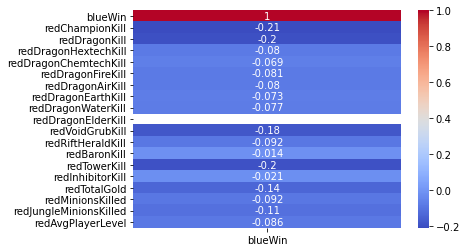

In [12]:
sns.heatmap(dataset_60.corr()[['blueWin']].tail(19), annot=True, cmap='coolwarm')

<AxesSubplot:>

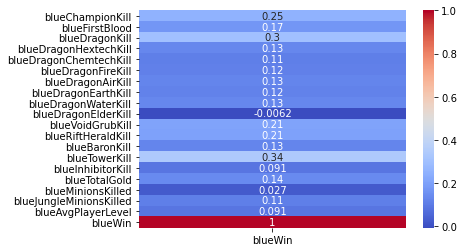

In [13]:
sns.heatmap(dataset_80.corr()[['blueWin']].head(20), annot=True, cmap='coolwarm')

<AxesSubplot:>

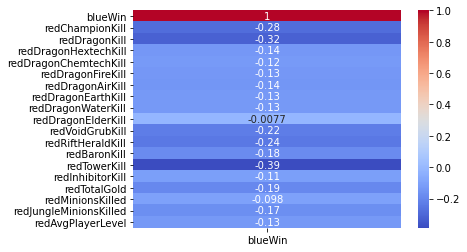

In [14]:
sns.heatmap(dataset_80.corr()[['blueWin']].tail(19), annot=True, cmap='coolwarm')

<AxesSubplot:>

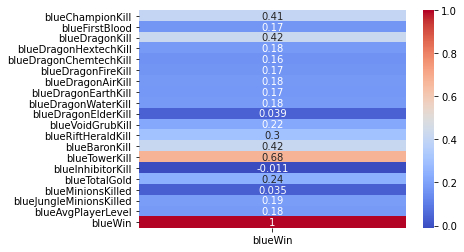

In [15]:
sns.heatmap(dataset_100.corr()[['blueWin']].head(20), annot=True, cmap='coolwarm')

<AxesSubplot:>

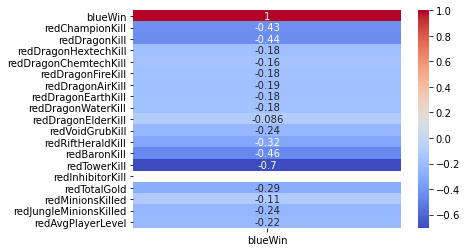

In [16]:
sns.heatmap(dataset_100.corr()[['blueWin']].tail(19), annot=True, cmap='coolwarm')

### Print Correlation Matrix

In [17]:
temporary_list = list()
for i in dataset_20:
    temporary_list.append(i)

In [18]:
correlation_matrix = dataset_20.corr()

for i in temporary_list:
    print(i, end=": ")
    print(correlation_matrix['blueWin'][i])

blueChampionKill: 0.08524533837657587
blueFirstBlood: 0.1708592649029073
blueDragonKill: -0.0028464804334949086
blueDragonHextechKill: -0.008186241389383266
blueDragonChemtechKill: -7.160310213990595e-05
blueDragonFireKill: 0.0023416239915605595
blueDragonAirKill: 0.0035842840474605386
blueDragonEarthKill: -0.009496889856533101
blueDragonWaterKill: 0.004862687395643892
blueDragonElderKill: nan
blueVoidGrubKill: -0.02255588793543914
blueRiftHeraldKill: nan
blueBaronKill: nan
blueTowerKill: 0.0019077744004709575
blueInhibitorKill: nan
blueTotalGold: 0.027926067787001255
blueMinionsKilled: -0.006818317422491969
blueJungleMinionsKilled: -0.004018373393196787
blueAvgPlayerLevel: 0.005599018886926001
blueWin: 1.0
redChampionKill: -0.10027684520390781
redDragonKill: -0.026284730434396403
redDragonHextechKill: -0.015211066072133033
redDragonChemtechKill: -0.007303291167335105
redDragonFireKill: -0.00673268082061396
redDragonAirKill: -0.00986033608060198
redDragonEarthKill: -0.01970560526431010

In [19]:
correlation_matrix = dataset_40.corr()

for i in temporary_list:
    print(i, end=": ")
    print(correlation_matrix['blueWin'][i])

blueChampionKill: 0.1374954221879346
blueFirstBlood: 0.1708592649029073
blueDragonKill: 0.07428343495644317
blueDragonHextechKill: 0.03868011443995377
blueDragonChemtechKill: 0.022898943618844675
blueDragonFireKill: 0.028818753106360215
blueDragonAirKill: 0.02362927589805809
blueDragonEarthKill: 0.024707779890809998
blueDragonWaterKill: 0.03232384431267445
blueDragonElderKill: nan
blueVoidGrubKill: 0.05161364297953324
blueRiftHeraldKill: -0.010919588304338637
blueBaronKill: nan
blueTowerKill: 0.014148609543763199
blueInhibitorKill: -0.007816983511435794
blueTotalGold: 0.05684846043124181
blueMinionsKilled: 0.00885559718585355
blueJungleMinionsKilled: 0.01991429283591806
blueAvgPlayerLevel: 0.02888277101227096
blueWin: 1.0
redChampionKill: -0.1603502402951058
redDragonKill: -0.10808329059273879
redDragonHextechKill: -0.044762288429060354
redDragonChemtechKill: -0.02850791744785329
redDragonFireKill: -0.04204957642744761
redDragonAirKill: -0.042869273994857245
redDragonEarthKill: -0.0349

In [20]:
correlation_matrix = dataset_60.corr()

for i in temporary_list:
    print(i, end=": ")
    print(correlation_matrix['blueWin'][i])

blueChampionKill: 0.18462669629188003
blueFirstBlood: 0.1708592649029073
blueDragonKill: 0.17255358059729226
blueDragonHextechKill: 0.07900497504089093
blueDragonChemtechKill: 0.06150665177600129
blueDragonFireKill: 0.06556335348302898
blueDragonAirKill: 0.07209584237466234
blueDragonEarthKill: 0.06749975273358613
blueDragonWaterKill: 0.07527779602411
blueDragonElderKill: nan
blueVoidGrubKill: 0.15400303307847613
blueRiftHeraldKill: 0.051709878795381414
blueBaronKill: -0.01010165338107031
blueTowerKill: 0.13614488807963415
blueInhibitorKill: 0.008188586718635007
blueTotalGold: 0.090694195317373
blueMinionsKilled: 0.021899018504153062
blueJungleMinionsKilled: 0.05246224564123078
blueAvgPlayerLevel: 0.049296514869750854
blueWin: 1.0
redChampionKill: -0.21145904918650948
redDragonKill: -0.19793654346511036
redDragonHextechKill: -0.07984779989780474
redDragonChemtechKill: -0.06928932875639049
redDragonFireKill: -0.08122233479193777
redDragonAirKill: -0.08004160488496811
redDragonEarthKill:

In [21]:
correlation_matrix = dataset_80.corr()

for i in temporary_list:
    print(i, end=": ")
    print(correlation_matrix['blueWin'][i])

blueChampionKill: 0.2539900951347596
blueFirstBlood: 0.1708592649029073
blueDragonKill: 0.3010075291105987
blueDragonHextechKill: 0.13413344168838562
blueDragonChemtechKill: 0.11488835828281689
blueDragonFireKill: 0.11710561598449608
blueDragonAirKill: 0.12963797662329807
blueDragonEarthKill: 0.12210975981744453
blueDragonWaterKill: 0.1325449702428379
blueDragonElderKill: -0.006224624865361131
blueVoidGrubKill: 0.20962094844537585
blueRiftHeraldKill: 0.20502267237282526
blueBaronKill: 0.1304337554162517
blueTowerKill: 0.34055091642142676
blueInhibitorKill: 0.09147313712868285
blueTotalGold: 0.14175465894576753
blueMinionsKilled: 0.02733709778576907
blueJungleMinionsKilled: 0.11184233780578301
blueAvgPlayerLevel: 0.09087396367666781
blueWin: 1.0
redChampionKill: -0.2800997085657472
redDragonKill: -0.3199851172814808
redDragonHextechKill: -0.1362210090366385
redDragonChemtechKill: -0.12155401670667994
redDragonFireKill: -0.1319851625513885
redDragonAirKill: -0.13845256091552213
redDragon

In [22]:
correlation_matrix = dataset_100.corr()

for i in temporary_list:
    print(i, end=": ")
    print(correlation_matrix['blueWin'][i])

blueChampionKill: 0.40618014921729056
blueFirstBlood: 0.1708592649029073
blueDragonKill: 0.42479121805072956
blueDragonHextechKill: 0.17987628471926623
blueDragonChemtechKill: 0.1616299464990043
blueDragonFireKill: 0.16517521381693423
blueDragonAirKill: 0.1781200591215504
blueDragonEarthKill: 0.1719971420080596
blueDragonWaterKill: 0.17929907171505927
blueDragonElderKill: 0.03904722585663587
blueVoidGrubKill: 0.22193849619610517
blueRiftHeraldKill: 0.3029290002053867
blueBaronKill: 0.4170343207334037
blueTowerKill: 0.6768604826816456
blueInhibitorKill: -0.010591755320146435
blueTotalGold: 0.2420033697147413
blueMinionsKilled: 0.03473123826089671
blueJungleMinionsKilled: 0.18708681353834244
blueAvgPlayerLevel: 0.18013873052486928
blueWin: 1.0
redChampionKill: -0.4313396362967996
redDragonKill: -0.4374972099467246
redDragonHextechKill: -0.18477433380820737
redDragonChemtechKill: -0.16478573330287594
redDragonFireKill: -0.1811065729828822
redDragonAirKill: -0.18570239170433964
redDragonEa

### Logistic Regression

In [23]:
# Defining Pipeline
logisticRegression = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(max_iter=1000))
])

In [24]:
# Perform Cross-Validation

start_logistic_regression = time.time()

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores_20_logistic_regression = cross_val_score(logisticRegression, X_20, y_20, cv=cv, scoring='accuracy')
scores_40_logistic_regression = cross_val_score(logisticRegression, X_40, y_40, cv=cv, scoring='accuracy')
scores_60_logistic_regression = cross_val_score(logisticRegression, X_60, y_60, cv=cv, scoring='accuracy')
scores_80_logistic_regression = cross_val_score(logisticRegression, X_80, y_80, cv=cv, scoring='accuracy')
scores_100_logistic_regression = cross_val_score(logisticRegression, X_100, y_100, cv=cv, scoring='accuracy')

end_logistic_regression = time.time()

logistic_regression_time = end_logistic_regression - start_logistic_regression

In [25]:
print(scores_20_logistic_regression)
print(scores_40_logistic_regression)
print(scores_60_logistic_regression)
print(scores_80_logistic_regression)
print(scores_100_logistic_regression)

[0.63944734 0.63953007 0.64730702 0.64209481 0.64523869]
[0.71746505 0.7134111  0.72077439 0.72300819 0.71721684]
[0.78952594 0.78282452 0.78737487 0.78514106 0.7894432 ]
[0.87614793 0.87093572 0.86994291 0.87283859 0.87358319]
[0.98411517 0.98477703 0.98485977 0.9846943  0.98767271]


In [26]:
print("Acurracy dataset_20: ", end="")
print(scores_20_logistic_regression.mean() * 100, end="%\n")
print("Acurracy dataset_40: ", end="")
print(scores_40_logistic_regression.mean() * 100, end="%\n")
print("Acurracy dataset_60: ", end="")
print(scores_60_logistic_regression.mean() * 100, end="%\n")
print("Acurracy dataset_80: ", end="")
print(scores_80_logistic_regression.mean() * 100, end="%\n")
print("Acurracy dataset_100: ", end="")
print(scores_100_logistic_regression.mean() * 100, end="%\n")

Acurracy dataset_20: 64.27235873252253%
Acurracy dataset_40: 71.83751137585837%
Acurracy dataset_60: 78.68619177628858%
Acurracy dataset_80: 87.2689666583933%
Acurracy dataset_100: 98.52237941590138%


In [27]:
logistic_regression_accuracy = list()
logistic_regression_accuracy.append(scores_20_logistic_regression.mean() * 100)
logistic_regression_accuracy.append(scores_40_logistic_regression.mean() * 100)
logistic_regression_accuracy.append(scores_60_logistic_regression.mean() * 100)
logistic_regression_accuracy.append(scores_80_logistic_regression.mean() * 100)
logistic_regression_accuracy.append(scores_100_logistic_regression.mean() * 100)

### Decision Tree

In [28]:
# Defining Pipeline
decisionTree = Pipeline([
    ('classifier', DecisionTreeClassifier())
])

In [29]:
# Perform Cross-Validation

start_decision_tree = time.time()

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores_20_decision_tree = cross_val_score(decisionTree, X_20, y_20, cv=cv, scoring='accuracy')
scores_40_decision_tree = cross_val_score(decisionTree, X_40, y_40, cv=cv, scoring='accuracy')
scores_60_decision_tree = cross_val_score(decisionTree, X_60, y_60, cv=cv, scoring='accuracy')
scores_80_decision_tree = cross_val_score(decisionTree, X_80, y_80, cv=cv, scoring='accuracy')
scores_100_decision_tree = cross_val_score(decisionTree, X_100, y_100, cv=cv, scoring='accuracy')

end_decision_tree = time.time()

decision_tree_time = end_decision_tree - start_decision_tree

In [30]:
print(scores_20_decision_tree)
print(scores_40_decision_tree)
print(scores_60_decision_tree)
print(scores_80_decision_tree)
print(scores_100_decision_tree)

[0.58037561 0.57259866 0.57508067 0.56722098 0.5761562 ]
[0.64631422 0.64350128 0.64085381 0.64962356 0.64350128]
[0.71721684 0.72656573 0.71324564 0.71787871 0.72499379]
[0.81897907 0.81484239 0.81897907 0.82088194 0.81525606]
[0.97278067 0.97749648 0.97435261 0.97567635 0.97757922]


In [31]:
print("Acurracy dataset_20: ", end="")
print(scores_20_decision_tree.mean() * 100, end="%\n")
print("Acurracy dataset_40: ", end="")
print(scores_40_decision_tree.mean() * 100, end="%\n")
print("Acurracy dataset_60: ", end="")
print(scores_60_decision_tree.mean() * 100, end="%\n")
print("Acurracy dataset_80: ", end="")
print(scores_80_decision_tree.mean() * 100, end="%\n")
print("Acurracy dataset_100: ", end="")
print(scores_100_decision_tree.mean() * 100, end="%\n")

Acurracy dataset_20: 57.428642343013145%
Acurracy dataset_40: 64.47588318027633%
Acurracy dataset_60: 71.99801439563167%
Acurracy dataset_80: 81.77877057996194%
Acurracy dataset_100: 97.55770662695457%


In [32]:
decision_tree_accuracy = list()
decision_tree_accuracy.append(scores_20_decision_tree.mean() * 100)
decision_tree_accuracy.append(scores_40_decision_tree.mean() * 100)
decision_tree_accuracy.append(scores_60_decision_tree.mean() * 100)
decision_tree_accuracy.append(scores_80_decision_tree.mean() * 100)
decision_tree_accuracy.append(scores_100_decision_tree.mean() * 100)

### Random Forest

In [33]:
# Defining Pipeline
randomForest = Pipeline([
    ('classifier', RandomForestClassifier())
])

In [34]:
# Perform Cross-Validation

start_random_forest = time.time()

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores_20_random_forest = cross_val_score(randomForest, X_20, y_20, cv=cv, scoring='accuracy')
scores_40_random_forest = cross_val_score(randomForest, X_40, y_40, cv=cv, scoring='accuracy')
scores_60_random_forest = cross_val_score(randomForest, X_60, y_60, cv=cv, scoring='accuracy')
scores_80_random_forest = cross_val_score(randomForest, X_80, y_80, cv=cv, scoring='accuracy')
scores_100_random_forest = cross_val_score(randomForest, X_100, y_100, cv=cv, scoring='accuracy')

end_random_forest = time.time()

random_forest_time = end_random_forest - start_random_forest

In [35]:
print(scores_20_random_forest)
print(scores_40_random_forest)
print(scores_60_random_forest)
print(scores_80_random_forest)
print(scores_100_random_forest)

[0.62803011 0.62968479 0.63473153 0.62538264 0.63266319]
[0.70935716 0.70406222 0.71920245 0.7131629  0.71051543]
[0.78679573 0.78191445 0.78150079 0.78522379 0.78663026]
[0.87110118 0.87159758 0.86712997 0.87325225 0.87565153]
[0.9849425  0.9856871  0.98378423 0.9854389  0.98725904]


In [36]:
print("Acurracy dataset_20: ", end="")
print(scores_20_random_forest.mean() * 100, end="%\n")
print("Acurracy dataset_40: ", end="")
print(scores_40_random_forest.mean() * 100, end="%\n")
print("Acurracy dataset_60: ", end="")
print(scores_60_random_forest.mean() * 100, end="%\n")
print("Acurracy dataset_80: ", end="")
print(scores_80_random_forest.mean() * 100, end="%\n")
print("Acurracy dataset_100: ", end="")
print(scores_100_random_forest.mean() * 100, end="%\n")

Acurracy dataset_20: 63.0098452883263%
Acurracy dataset_40: 71.12600314387358%
Acurracy dataset_60: 78.44130057086126%
Acurracy dataset_80: 87.17465045089767%
Acurracy dataset_100: 98.54223545958469%


In [37]:
random_forest_accuracy = list()
random_forest_accuracy.append(scores_20_random_forest.mean() * 100)
random_forest_accuracy.append(scores_40_random_forest.mean() * 100)
random_forest_accuracy.append(scores_60_random_forest.mean() * 100)
random_forest_accuracy.append(scores_80_random_forest.mean() * 100)
random_forest_accuracy.append(scores_100_random_forest.mean() * 100)

### KNN

In [38]:
# Defining Pipeline
KNN = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', KNeighborsClassifier())
])

In [39]:
# Perform Cross-Validation

start_knn = time.time()

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores_20_knn = cross_val_score(KNN, X_20, y_20, cv=cv, scoring='accuracy')
scores_40_knn = cross_val_score(KNN, X_40, y_40, cv=cv, scoring='accuracy')
scores_60_knn = cross_val_score(KNN, X_60, y_60, cv=cv, scoring='accuracy')
scores_80_knn = cross_val_score(KNN, X_80, y_80, cv=cv, scoring='accuracy')
scores_100_knn = cross_val_score(KNN, X_100, y_100, cv=cv, scoring='accuracy')

end_knn = time.time()

knn_time = end_knn - start_knn

In [40]:
print(scores_20_knn)
print(scores_40_knn)
print(scores_60_knn)
print(scores_80_knn)
print(scores_100_knn)

[0.59725325 0.5927029  0.59990072 0.59369571 0.59741871]
[0.6652602  0.67220981 0.66633573 0.66559113 0.66203359]
[0.72788947 0.72954414 0.72813767 0.73674195 0.73475635]
[0.81153305 0.81095392 0.80987838 0.8170762  0.82055101]
[0.95151816 0.95126996 0.94771242 0.95209729 0.95201456]


In [41]:
print("Acurracy dataset_20: ", end="")
print(scores_20_knn.mean() * 100, end="%\n")
print("Acurracy dataset_40: ", end="")
print(scores_40_knn.mean() * 100, end="%\n")
print("Acurracy dataset_60: ", end="")
print(scores_60_knn.mean() * 100, end="%\n")
print("Acurracy dataset_80: ", end="")
print(scores_80_knn.mean() * 100, end="%\n")
print("Acurracy dataset_100: ", end="")
print(scores_100_knn.mean() * 100, end="%\n")

Acurracy dataset_20: 59.6194258294035%
Acurracy dataset_40: 66.62860924960702%
Acurracy dataset_60: 73.14139157772814%
Acurracy dataset_80: 81.39985107967236%
Acurracy dataset_100: 95.09224786961198%


In [42]:
knn_accuracy = list()
knn_accuracy.append(scores_20_knn.mean() * 100)
knn_accuracy.append(scores_40_knn.mean() * 100)
knn_accuracy.append(scores_60_knn.mean() * 100)
knn_accuracy.append(scores_80_knn.mean() * 100)
knn_accuracy.append(scores_100_knn.mean() * 100)

### Naive Bayes (GaussianNB)

In [43]:
# Defining Pipeline
naiveBayes = Pipeline([
    ('classifier', GaussianNB())
])

In [44]:
# Perform Cross-Validation

start_naive_bayes = time.time()

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores_20_naive_bayes = cross_val_score(naiveBayes, X_20, y_20, cv=cv, scoring='accuracy')
scores_40_naive_bayes = cross_val_score(naiveBayes, X_40, y_40, cv=cv, scoring='accuracy')
scores_60_naive_bayes = cross_val_score(naiveBayes, X_60, y_60, cv=cv, scoring='accuracy')
scores_80_naive_bayes = cross_val_score(naiveBayes, X_80, y_80, cv=cv, scoring='accuracy')
scores_100_naive_bayes = cross_val_score(naiveBayes, X_100, y_100, cv=cv, scoring='accuracy')

end_naive_bayes = time.time()

naive_bayes_time = end_naive_bayes - start_naive_bayes

In [45]:
print(scores_20_naive_bayes)
print(scores_40_naive_bayes)
print(scores_60_naive_bayes)
print(scores_80_naive_bayes)
print(scores_100_naive_bayes)

[0.54322826 0.53603045 0.53569951 0.54240093 0.55001241]
[0.60412013 0.61479275 0.60643667 0.61677836 0.61413088]
[0.70555142 0.70828162 0.70952263 0.70844709 0.7119219 ]
[0.81095392 0.81475966 0.81202945 0.81475966 0.81939274]
[0.95102176 0.95209729 0.95093903 0.95565484 0.95664764]


In [46]:
print("Acurracy dataset_20: ", end="")
print(scores_20_naive_bayes.mean() * 100, end="%\n")
print("Acurracy dataset_40: ", end="")
print(scores_40_naive_bayes.mean() * 100, end="%\n")
print("Acurracy dataset_60: ", end="")
print(scores_60_naive_bayes.mean() * 100, end="%\n")
print("Acurracy dataset_80: ", end="")
print(scores_80_naive_bayes.mean() * 100, end="%\n")
print("Acurracy dataset_100: ", end="")
print(scores_100_naive_bayes.mean() * 100, end="%\n")

Acurracy dataset_20: 54.147431124348465%
Acurracy dataset_40: 61.12517580872011%
Acurracy dataset_60: 70.8744932572185%
Acurracy dataset_80: 81.43790849673202%
Acurracy dataset_100: 95.32721105319766%


In [47]:
naive_bayes_accuracy = list()
naive_bayes_accuracy.append(scores_20_naive_bayes.mean() * 100)
naive_bayes_accuracy.append(scores_40_naive_bayes.mean() * 100)
naive_bayes_accuracy.append(scores_60_naive_bayes.mean() * 100)
naive_bayes_accuracy.append(scores_80_naive_bayes.mean() * 100)
naive_bayes_accuracy.append(scores_100_naive_bayes.mean() * 100)

### Support Vector Machine

In [48]:
# Defining Pipeline
supportVectorMachine = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SVC())
])

In [49]:
# Perform Cross-Validation

start_svm = time.time()

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores_20_support_vector_machine = cross_val_score(supportVectorMachine, X_20, y_20, cv=cv, scoring='accuracy')
scores_40_support_vector_machine = cross_val_score(supportVectorMachine, X_40, y_40, cv=cv, scoring='accuracy')
scores_60_support_vector_machine = cross_val_score(supportVectorMachine, X_60, y_60, cv=cv, scoring='accuracy')
scores_80_support_vector_machine = cross_val_score(supportVectorMachine, X_80, y_80, cv=cv, scoring='accuracy')
scores_100_support_vector_machine = cross_val_score(supportVectorMachine, X_100, y_100, cv=cv, scoring='accuracy')

end_svm = time.time()

svm_time = end_svm - start_svm

In [50]:
print(scores_20_support_vector_machine)
print(scores_40_support_vector_machine)
print(scores_60_support_vector_machine)
print(scores_80_support_vector_machine)
print(scores_100_support_vector_machine)

[0.64110201 0.64010921 0.64755522 0.64374948 0.64763796]
[0.71779598 0.71382477 0.72052619 0.72474559 0.72160172]
[0.7886986  0.7864648  0.7864648  0.78861587 0.78878134]
[0.87242492 0.87250765 0.86688177 0.87192852 0.87416232]
[0.9837015  0.98279143 0.98204683 0.9832051  0.9844461 ]


In [51]:
print("Acurracy dataset_20: ", end="")
print(scores_20_support_vector_machine.mean() * 100, end="%\n")
print("Acurracy dataset_40: ", end="")
print(scores_40_support_vector_machine.mean() * 100, end="%\n")
print("Acurracy dataset_60: ", end="")
print(scores_60_support_vector_machine.mean() * 100, end="%\n")
print("Acurracy dataset_80: ", end="")
print(scores_80_support_vector_machine.mean() * 100, end="%\n")
print("Acurracy dataset_100: ", end="")
print(scores_100_support_vector_machine.mean() * 100, end="%\n")

Acurracy dataset_20: 64.4030776867709%
Acurracy dataset_40: 71.96988500041365%
Acurracy dataset_60: 78.78050798378423%
Acurracy dataset_80: 87.15810374782824%
Acurracy dataset_100: 98.32381897906842%


In [52]:
support_vector_machine_accuracy = list()
support_vector_machine_accuracy.append(scores_20_support_vector_machine.mean() * 100)
support_vector_machine_accuracy.append(scores_40_support_vector_machine.mean() * 100)
support_vector_machine_accuracy.append(scores_60_support_vector_machine.mean() * 100)
support_vector_machine_accuracy.append(scores_80_support_vector_machine.mean() * 100)
support_vector_machine_accuracy.append(scores_100_support_vector_machine.mean() * 100)

### Neural Network

In [53]:
# Defining Pipeline (MLP: Multi-layer Perceptron)
MLP = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu', max_iter=1000, random_state=42))
])

In [54]:
# Perform Cross-Validation

start_neural_network = time.time()

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores_20_mlp = cross_val_score(MLP, X_20, y_20, cv=cv, scoring='accuracy')
scores_40_mlp = cross_val_score(MLP, X_40, y_40, cv=cv, scoring='accuracy')
scores_60_mlp = cross_val_score(MLP, X_60, y_60, cv=cv, scoring='accuracy')
scores_80_mlp = cross_val_score(MLP, X_80, y_80, cv=cv, scoring='accuracy')
scores_100_mlp = cross_val_score(MLP, X_100, y_100, cv=cv, scoring='accuracy')

end_neural_network = time.time()

neural_network_time = end_neural_network - start_neural_network

In [55]:
print(scores_20_mlp)
print(scores_20_mlp)
print(scores_20_mlp)
print(scores_20_mlp)
print(scores_20_mlp)

[0.62571358 0.63671713 0.64217755 0.62637544 0.63398693]
[0.62571358 0.63671713 0.64217755 0.62637544 0.63398693]
[0.62571358 0.63671713 0.64217755 0.62637544 0.63398693]
[0.62571358 0.63671713 0.64217755 0.62637544 0.63398693]
[0.62571358 0.63671713 0.64217755 0.62637544 0.63398693]


In [56]:
print("Acurracy dataset_20: ", end="")
print(scores_20_mlp.mean() * 100, end="%\n")
print("Acurracy dataset_40: ", end="")
print(scores_40_mlp.mean() * 100, end="%\n")
print("Acurracy dataset_60: ", end="")
print(scores_60_mlp.mean() * 100, end="%\n")
print("Acurracy dataset_80: ", end="")
print(scores_80_mlp.mean() * 100, end="%\n")
print("Acurracy dataset_100: ", end="")
print(scores_100_mlp.mean() * 100, end="%\n")

Acurracy dataset_20: 63.29941259204104%
Acurracy dataset_40: 70.35327211053198%
Acurracy dataset_60: 76.7055514188798%
Acurracy dataset_80: 85.32472904773725%
Acurracy dataset_100: 98.56540084388186%


In [57]:
neural_network_accuracy = list()
neural_network_accuracy.append(scores_20_mlp.mean() * 100)
neural_network_accuracy.append(scores_40_mlp.mean() * 100)
neural_network_accuracy.append(scores_60_mlp.mean() * 100)
neural_network_accuracy.append(scores_80_mlp.mean() * 100)
neural_network_accuracy.append(scores_100_mlp.mean() * 100)

### Ada Boost

In [58]:
# Defining Pipeline
adaBoost = Pipeline([
    ('mlp', AdaBoostClassifier())
])

In [59]:
# Perform Cross-Validation

start_ada_boost = time.time()

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores_20_ada_boost = cross_val_score(adaBoost, X_20, y_20, cv=cv, scoring='accuracy')
scores_40_ada_boost = cross_val_score(adaBoost, X_40, y_40, cv=cv, scoring='accuracy')
scores_60_ada_boost = cross_val_score(adaBoost, X_60, y_60, cv=cv, scoring='accuracy')
scores_80_ada_boost = cross_val_score(adaBoost, X_80, y_80, cv=cv, scoring='accuracy')
scores_100_ada_boost = cross_val_score(adaBoost, X_100, y_100, cv=cv, scoring='accuracy')

end_ada_boost = time.time()

ada_boost_time = end_ada_boost - start_ada_boost

In [60]:
print(scores_20_ada_boost)
print(scores_40_ada_boost)
print(scores_60_ada_boost)
print(scores_80_ada_boost)
print(scores_100_ada_boost)

[0.62927112 0.62629271 0.63754447 0.62753371 0.63365599]
[0.69239679 0.69214859 0.70166294 0.69893274 0.69372053]
[0.76569868 0.76263754 0.76412675 0.76420948 0.76189294]
[0.84727393 0.84950774 0.84934227 0.85141061 0.85422355]
[0.97493174 0.97476628 0.97253247 0.97534541 0.97683462]


In [61]:
print("Acurracy dataset_20: ", end="")
print(scores_20_ada_boost.mean() * 100, end="%\n")
print("Acurracy dataset_40: ", end="")
print(scores_40_ada_boost.mean() * 100, end="%\n")
print("Acurracy dataset_60: ", end="")
print(scores_60_ada_boost.mean() * 100, end="%\n")
print("Acurracy dataset_80: ", end="")
print(scores_80_ada_boost.mean() * 100, end="%\n")
print("Acurracy dataset_100: ", end="")
print(scores_100_ada_boost.mean() * 100, end="%\n")

Acurracy dataset_20: 63.085960122445606%
Acurracy dataset_40: 69.57723173657648%
Acurracy dataset_60: 76.37130801687763%
Acurracy dataset_80: 85.0351617440225%
Acurracy dataset_100: 97.48821047406304%


In [62]:
ada_boost_accuracy = list()
ada_boost_accuracy.append(scores_20_ada_boost.mean() * 100)
ada_boost_accuracy.append(scores_40_ada_boost.mean() * 100)
ada_boost_accuracy.append(scores_60_ada_boost.mean() * 100)
ada_boost_accuracy.append(scores_80_ada_boost.mean() * 100)
ada_boost_accuracy.append(scores_100_ada_boost.mean() * 100)

### Gradient Boosting

In [63]:
# Defining Pipeline
gradientBoosting = Pipeline([
    ('mlp', GradientBoostingClassifier())
])

In [64]:
# Perform Cross-Validation

start_gradient_boosting = time.time()

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores_20_gradient_boosting = cross_val_score(gradientBoosting, X_20, y_20, cv=cv, scoring='accuracy')
scores_40_gradient_boosting = cross_val_score(gradientBoosting, X_40, y_40, cv=cv, scoring='accuracy')
scores_60_gradient_boosting = cross_val_score(gradientBoosting, X_60, y_60, cv=cv, scoring='accuracy')
scores_80_gradient_boosting = cross_val_score(gradientBoosting, X_80, y_80, cv=cv, scoring='accuracy')
scores_100_gradient_boosting = cross_val_score(gradientBoosting, X_100, y_100, cv=cv, scoring='accuracy')

end_gradient_boosting = time.time()

gradient_boosting_time = end_gradient_boosting - start_gradient_boosting

In [65]:
print(scores_20_gradient_boosting)
print(scores_40_gradient_boosting)
print(scores_60_gradient_boosting)
print(scores_80_gradient_boosting)
print(scores_100_gradient_boosting)

[0.63473153 0.6363862  0.64838256 0.63572433 0.64474229]
[0.71134276 0.71324564 0.71903698 0.71250103 0.7111773 ]
[0.78439646 0.78406552 0.78224539 0.78017705 0.78290726]
[0.86729544 0.86564077 0.86365517 0.87019111 0.86994291]
[0.98221229 0.98461157 0.98113676 0.9844461  0.98485977]


In [66]:
print("Acurracy dataset_20: ", end="")
print(scores_20_gradient_boosting.mean() * 100, end="%\n")
print("Acurracy dataset_40: ", end="")
print(scores_40_gradient_boosting.mean() * 100, end="%\n")
print("Acurracy dataset_60: ", end="")
print(scores_60_gradient_boosting.mean() * 100, end="%\n")
print("Acurracy dataset_80: ", end="")
print(scores_80_gradient_boosting.mean() * 100, end="%\n")
print("Acurracy dataset_100: ", end="")
print(scores_100_gradient_boosting.mean() * 100, end="%\n")

Acurracy dataset_20: 63.999338131877224%
Acurracy dataset_40: 71.34607429469678%
Acurracy dataset_60: 78.27583354016711%
Acurracy dataset_80: 86.73450814925128%
Acurracy dataset_100: 98.34532969305864%


In [67]:
gradient_boosting_accuracy = list()
gradient_boosting_accuracy.append(scores_20_gradient_boosting.mean() * 100)
gradient_boosting_accuracy.append(scores_40_gradient_boosting.mean() * 100)
gradient_boosting_accuracy.append(scores_60_gradient_boosting.mean() * 100)
gradient_boosting_accuracy.append(scores_80_gradient_boosting.mean() * 100)
gradient_boosting_accuracy.append(scores_100_gradient_boosting.mean() * 100)

### Own Algorithm

In [68]:
dataset_20 = pd.read_csv(FULL_DATA_NEW_20_PATH)
dataset_40 = pd.read_csv(FULL_DATA_NEW_40_PATH)
dataset_60 = pd.read_csv(FULL_DATA_NEW_60_PATH)
dataset_80 = pd.read_csv(FULL_DATA_NEW_80_PATH)
dataset_100 = pd.read_csv(FULL_DATA_NEW_100_PATH)

In [69]:
dataset_20 = dataset_20.iloc[:, [4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42]]
dataset_40 = dataset_40.iloc[:, [4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42]]
dataset_60 = dataset_60.iloc[:, [4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42]]
dataset_80 = dataset_80.iloc[:, [4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42]]
dataset_100 = dataset_100.iloc[:, [4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42]]

In [70]:
# Independent
X_20 = dataset_20.drop(dataset_20.columns[19], axis=1)
X_40 = dataset_40.drop(dataset_40.columns[19], axis=1)
X_60 = dataset_60.drop(dataset_60.columns[19], axis=1)
X_80 = dataset_80.drop(dataset_80.columns[19], axis=1)
X_100 = dataset_100.drop(dataset_100.columns[19], axis=1)

# Dependent
y_20 = dataset_20.iloc[:, 19].values
y_40 = dataset_40.iloc[:, 19].values
y_60 = dataset_60.iloc[:, 19].values
y_80 = dataset_80.iloc[:, 19].values
y_100 = dataset_100.iloc[:, 19].values

In [71]:
def ownAlgo(correlations, X_test, y_test):
    correct = 0
    incorrect = 0
    list_with_correlations_x = list()
    list_with_correlation_variables = list()
    
    list_with_normalized_correlations_x = list()
    sum = 0
    
    list_with_function_values = list()
    ultimate_list_with_function_values = list()
    
    list_of_probabilities_blueWin = list()
    probability_blueWin = 0
    boolean_list_of_probabilities_blueWin = list()
    
    
    
    
    in_function_correlations = correlations.fillna(0)
    
    for i in range(0,19):
        list_with_correlations_x.append((abs(in_function_correlations.loc[blueWin_correlations_100_1.index[i+19], 'blueWin']) + abs(in_function_correlations.loc[blueWin_correlations_100_1.index[i], 'blueWin']))/2)
    
    # list_with_correlations_x
    
    for i in list_with_correlations_x:
        sum += i
    
    for i in list_with_correlations_x:
        list_with_normalized_correlations_x.append(i/sum)
        
    # list_with_normalized_correlations_x
    
    # function: f(b,r)
    for i in range(0, len(X_test)):
        for j in range(0,19):
            b = X_test.iloc[i, :][j]
            r = X_test.iloc[i, :][j+19]
            list_with_function_values.append((b+1)/(b+r+2))
    
    ultimate_list_with_function_values = [list_with_function_values[i:i + 19] for i in range(0, len(list_with_function_values), 19)]
    
    for current_lwfv in ultimate_list_with_function_values:
        for i in range(0,19):
            probability_blueWin += list_with_normalized_correlations_x[i] * current_lwfv[i]
        list_of_probabilities_blueWin.append(probability_blueWin)
        probability_blueWin = 0
    
    for i in list_of_probabilities_blueWin:
        if i < 0.5:
            boolean_list_of_probabilities_blueWin.append(False)
        else:
            boolean_list_of_probabilities_blueWin.append(True)
            
    for i in range(0,len(X_20_test_1)):
        if boolean_list_of_probabilities_blueWin[i] == y_20_test_1[i]:
            correct += 1
        else:
            incorrect += 1
            
    return correct/(correct + incorrect)

In [72]:
# 20
X_20_train_1 = X_20[0:len(X_20)//5*4]
X_20_test_1 = X_20[len(X_20)//5*4:]

y_20_train_1 = y_20[0:len(y_20)//5*4]
y_20_test_1 = y_20[len(y_20)//5*4:]

# 40
X_40_train_1 = X_40[0:len(X_40)//5*4]
X_40_test_1 = X_40[len(X_40)//5*4:]

y_40_train_1 = y_40[0:len(y_40)//5*4]
y_40_test_1 = y_40[len(y_40)//5*4:]

# 60
X_60_train_1 = X_60[0:len(X_60)//5*4]
X_60_test_1 = X_60[len(X_60)//5*4:]

y_60_train_1 = y_60[0:len(y_60)//5*4]
y_60_test_1 = y_60[len(y_60)//5*4:]

# 80
X_80_train_1 = X_80[0:len(X_80)//5*4]
X_80_test_1 = X_80[len(X_80)//5*4:]

y_80_train_1 = y_80[0:len(y_80)//5*4]
y_80_test_1 = y_80[len(y_80)//5*4:]

# 100
X_100_train_1 = X_100[0:len(X_100)//5*4]
X_100_test_1 = X_100[len(X_100)//5*4:]

y_100_train_1 = y_100[0:len(y_100)//5*4]
y_100_test_1 = y_100[len(y_100)//5*4:]

In [73]:
corr_dataset_20_1 = dataset_20[:len(dataset_20)//5*4]
correlations_20_1 = corr_dataset_20_1.corr()
blueWin_correlations_20_1 = correlations_20_1[['blueWin']]

corr_dataset_40_1 = dataset_40[:len(dataset_40)//5*4]
correlations_40_1 = corr_dataset_40_1.corr()
blueWin_correlations_40_1 = correlations_40_1[['blueWin']]

corr_dataset_60_1 = dataset_60[:len(dataset_60)//5*4]
correlations_60_1 = corr_dataset_60_1.corr()
blueWin_correlations_60_1 = correlations_60_1[['blueWin']]

corr_dataset_80_1 = dataset_80[:len(dataset_80)//5*4]
correlations_80_1 = corr_dataset_80_1.corr()
blueWin_correlations_80_1 = correlations_80_1[['blueWin']]

corr_dataset_100_1 = dataset_100[:len(dataset_100)//5*4]
correlations_100_1 = corr_dataset_100_1.corr()
blueWin_correlations_100_1 = correlations_100_1[['blueWin']]

In [74]:
start_own_algorithm = time.time()

result_20_1 = ownAlgo(correlations_20_1, X_20_test_1, y_20_test_1)
result_40_1 = ownAlgo(correlations_40_1, X_40_test_1, y_40_test_1)
result_60_1 = ownAlgo(correlations_60_1, X_60_test_1, y_60_test_1)
result_80_1 = ownAlgo(correlations_80_1, X_80_test_1, y_80_test_1)
result_100_1 = ownAlgo(correlations_100_1, X_100_test_1, y_100_test_1)

print(result_20_1)
print(result_40_1)
print(result_60_1)
print(result_80_1)
print(result_100_1)

end_own_algorithm = time.time()

own_algorithm_time = end_own_algorithm - start_own_algorithm

0.6167783569123853
0.6864399768346157
0.7532886572350459
0.8375941093737073
0.938446264581782


In [75]:
own_algorithm_accuracy = list()
own_algorithm_accuracy.append(result_20_1 * 100)
own_algorithm_accuracy.append(result_40_1 * 100)
own_algorithm_accuracy.append(result_60_1 * 100)
own_algorithm_accuracy.append(result_80_1 * 100)
own_algorithm_accuracy.append(result_100_1 * 100)

### Line Chart (Accuracy)

In [2]:
time_intervals = ['20%', '40%', '60%', '80%', '100%']

data = pd.DataFrame({
    'Time Interval': time_intervals,
    'Logistic Regression': logistic_regression_accuracy,
    'Decision Tree': decision_tree_accuracy,
    'Random Forest': random_forest_accuracy,
    'KNN': knn_accuracy,
    'Naive Bayes': naive_bayes_accuracy,
    'Support Vector Machine': support_vector_machine_accuracy,
    'Neural Network': neural_network_accuracy,
    'Ada Boost': ada_boost_accuracy,
    'Gradient Boosting': gradient_boosting_accuracy,
    'Own Algorithm': own_algorithm_accuracy
})

data_long = pd.melt(data, id_vars=['Time Interval'],
                    value_vars=[
                        'Logistic Regression',
                        'Decision Tree',
                        'Random Forest',
                        'KNN',
                        'Naive Bayes',
                        'Support Vector Machine',
                        'Neural Network',
                        'Ada Boost',
                        'Gradient Boosting',
                        'Own Algorithm'
                    ],
                    var_name='ML Model',
                    value_name='Score')

plt.figure(figsize=(16,9))
sns.lineplot(x='Time Interval', y='Score', hue='ML Model', data=data_long, marker='o')

plt.grid(True, which='both', linestyle='-', linewidth=1, alpha=1)

plt.xlabel('Time Interval')
plt.ylabel('Model Accuracy')
plt.title('ML Accuracies')

#plt.savefig('10_accuracy_with_own_algorithm.png', dpi=300, bbox_inches='tight')
plt.show()

NameError: name 'pd' is not defined

In [77]:
list_with_times = [
                    logistic_regression_time,
                    decision_tree_time,
                    random_forest_time,
                    knn_time, 
                    naive_bayes_time, 
                    svm_time, 
                    neural_network_time, 
                    ada_boost_time, 
                    gradient_boosting_time,
                    own_algorithm_time
                 ]
print(list_with_times)

[9.17598557472229, 18.781130075454712, 284.1785695552826, 19.435492277145386, 1.2966129779815674, 2724.6180543899536, 1150.761843919754, 71.73661160469055, 300.59717082977295, 216.04056215286255]


In [93]:
ML_models_time = {
                    'Logistic Regression': int(list_with_times[0]),
                    'Decision Tree': int(list_with_times[1]),
                    'Random Forest': int(list_with_times[2]),
                    'KNN': int(list_with_times[3]),
                    'Naive Bayes': int(list_with_times[4]),
                    'SVM': int(list_with_times[5]),
                    'Neural Network': int(list_with_times[6]),
                    'Ada Boost': int(list_with_times[7]),
                    'Gradient Boosting': int(list_with_times[8]),
                    'Own Algorithm': int(list_with_times[9])
                }

ML_models = list(ML_models_time.keys())
time_durations = list(ML_models_time.values())

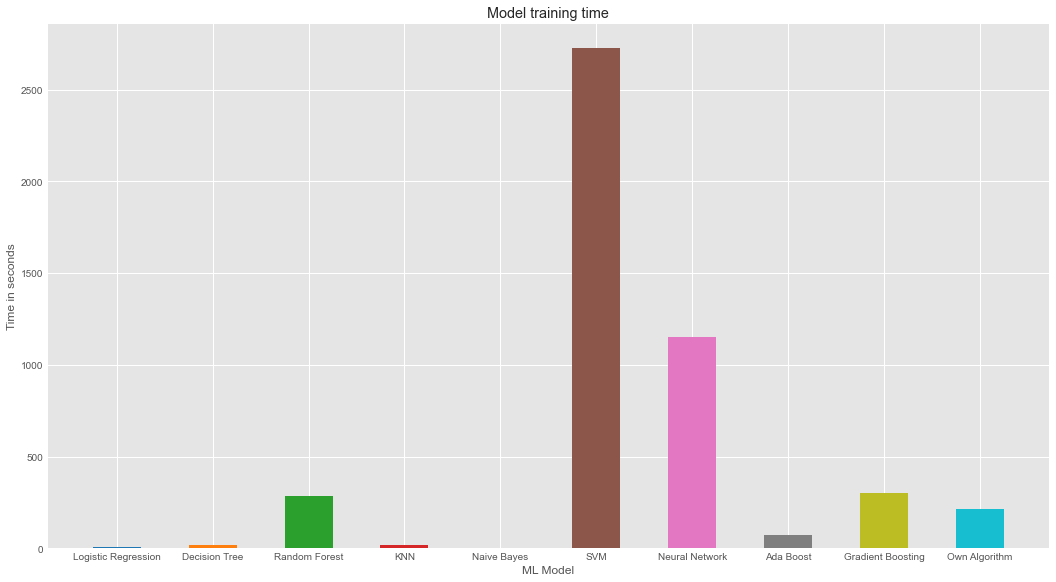

In [111]:
from matplotlib import style

style.use('ggplot')
plt.figure(figsize=(16,9))
color = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
plt.bar(ML_models, time_durations, color=color, width=0.5)
plt.xlabel('ML Model')
plt.ylabel('Time in seconds')
plt.title('Model training time')

#plt.savefig('10_model_training-time.png', dpi=300, bbox_inches='tight')